# **Kaggle House price prediction Challenge**

* used tool : Google Colab



## **Download data from Kaggle**

In [ ]:
#Uplod json files
! pip install -q kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhliscm","key":"1190bf0f2b325eb7a7836df3eaee4e63"}'}

In [ ]:

!pip install kaggle

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
#!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-01 11:18:46           6795  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4025  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1357  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           2115  
mathurinache/twitter-edge-nodes                             Twitter Edge Nod

In [ ]:
#download dataset
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 65.1MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 60.9MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 12.1MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 31.2MB/s]


In [ ]:
!ls

data_description.txt  sample_data	     test.csv
kaggle.json	      sample_submission.csv  train.csv




---


---


---



---





##**Explonatory Data Analysis**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sample_df = pd.read_csv("sample_submission.csv")

In [ ]:
sample_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print("training set shape is: ", train_df.shape)
print("test set shape is : ", test_df.shape)

training set shape is:  (1460, 81)
test set shape is :  (1459, 80)


In [ ]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

In [ ]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:

train_df.describe(include= 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,...,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,...,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,...,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,...,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,...,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,...,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.0

In [ ]:
# Setting number of rows and columns need to be show as dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
# Getting info of dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
missing_data = train_df.isnull()
missing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False


In [ ]:
# find missing values in each coloumns
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print()

  

Id
False    1460
Name: Id, dtype: int64

MSSubClass
False    1460
Name: MSSubClass, dtype: int64

MSZoning
False    1460
Name: MSZoning, dtype: int64

LotFrontage
False    1201
True      259
Name: LotFrontage, dtype: int64

LotArea
False    1460
Name: LotArea, dtype: int64

Street
False    1460
Name: Street, dtype: int64

Alley
True     1369
False      91
Name: Alley, dtype: int64

LotShape
False    1460
Name: LotShape, dtype: int64

LandContour
False    1460
Name: LandContour, dtype: int64

Utilities
False    1460
Name: Utilities, dtype: int64

LotConfig
False    1460
Name: LotConfig, dtype: int64

LandSlope
False    1460
Name: LandSlope, dtype: int64

Neighborhood
False    1460
Name: Neighborhood, dtype: int64

Condition1
False    1460
Name: Condition1, dtype: int64

Condition2
False    1460
Name: Condition2, dtype: int64

BldgType
False    1460
Name: BldgType, dtype: int64

HouseStyle
False    1460
Name: HouseStyle, dtype: int64

OverallQual
False    1460
Name: OverallQual, dtype: i

In [ ]:
train_df.isnull().sum()[train_df.isnull().sum() > 0].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [ ]:
#making null value data frame
null_df = train_df.isnull().sum()[train_df.isnull().sum() > 0].sort_values(ascending = False).reset_index()
null_df

,index,0
0,PoolQC,1453
1,MiscFeature,1406
2,Alley,1369
3,Fence,1179
4,FireplaceQu,690
5,LotFrontage,259
6,GarageYrBlt,81
7,GarageType,81
8,GarageFinish,81
9,GarageQual,81


In [ ]:
# find null values column list
null_value_columns = null_df["index"].values.tolist()

In [ ]:
# Creating list of null values with sales
null_value_columns_sales = null_value_columns + ["SalePrice"]
null_value_columns_sales

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageYrBlt',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType',
 'Electrical',
 'SalePrice']

In [ ]:
# check correlation with sales price
train_df[null_value_columns_sales].corr()

,LotFrontage,GarageYrBlt,MasVnrArea,SalePrice
LotFrontage,1.000000,0.070250,0.193458,0.351799
GarageYrBlt,0.070250,1.000000,0.252691,0.486362
MasVnrArea,0.193458,0.252691,1.000000,0.477493
SalePrice,0.351799,0.486362,0.477493,1.000000


In [ ]:
# creating variable
var_list = null_value_columns

In [ ]:
# Function to separate null variables as categorical and quantitative
null_obj_list = []
null_quant_list = []
def separator(data):
  if train_df[data].dtype == "object":
    null_obj_list.append(data)
  else:
    null_quant_list.append(data)
  return null_obj_list, null_quant_list

In [ ]:
# Calling separator function
len_var_list = len(var_list)
for i in range(len_var_list):
  separator(var_list[i])
  

In [ ]:
# print list of null values
print("objects: ", null_obj_list)
print("Quants : ",null_quant_list )

objects:  ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']
Quants :  ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']


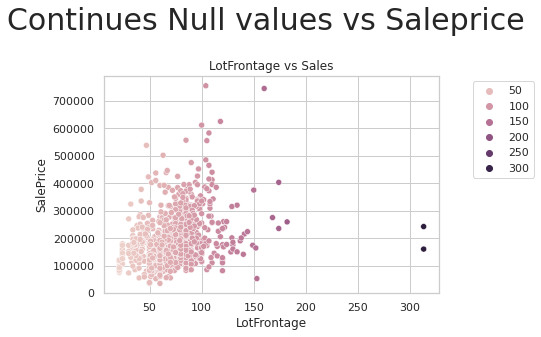

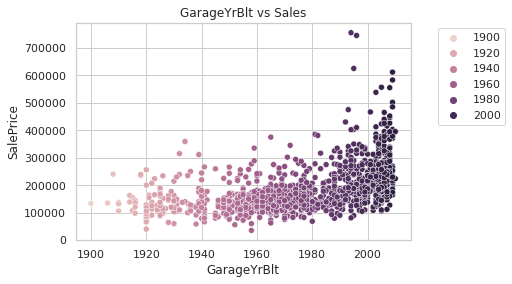

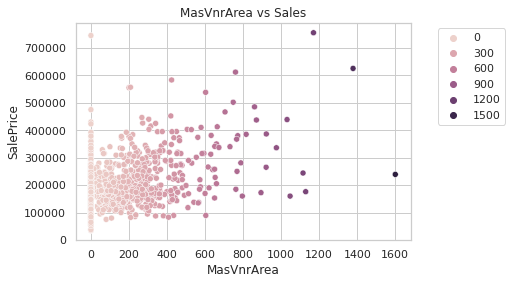

In [ ]:
# Creating scatter plots for continues null values
plt.suptitle("Continues Null values vs Saleprice", fontsize = 30, y = 1.12)

for feature in null_quant_list:
  sns.scatterplot(data = train_df, y =  "SalePrice", x =  feature, hue = feature)
  plt.legend(bbox_to_anchor = (1.3, 1))
  plt.title(feature + " vs Sales")
  #plt.savefig(feature+".png")  #for downloading pictures in colab
  #files.download(feature+".png")
  plt.show()
  print("")



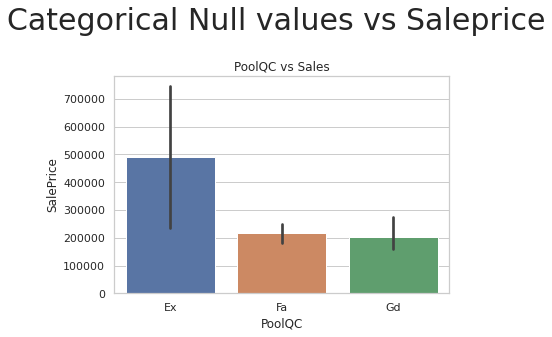

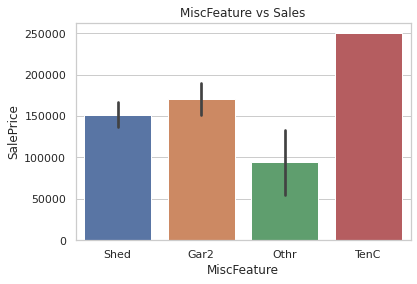

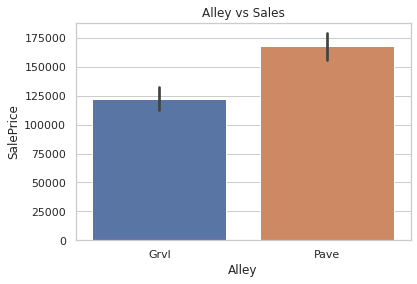

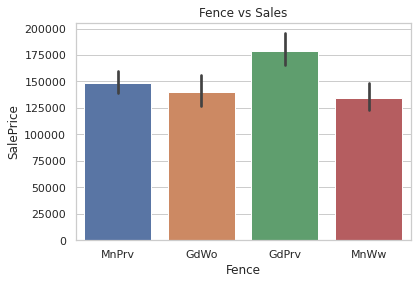

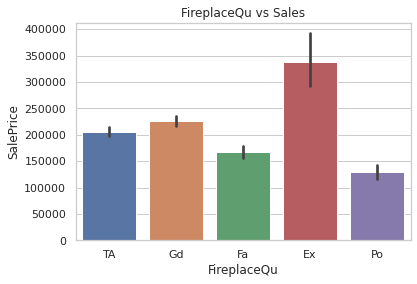

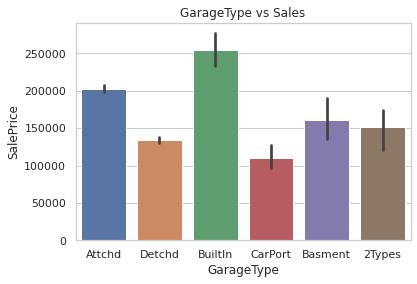

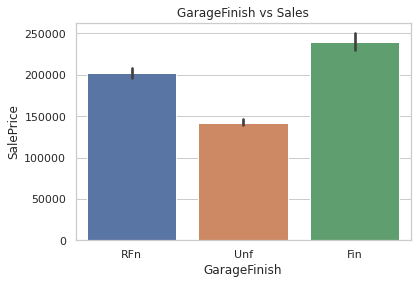

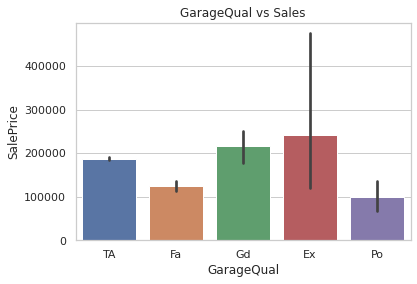

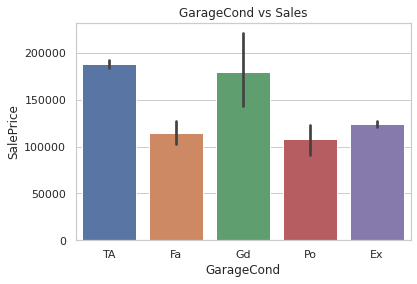

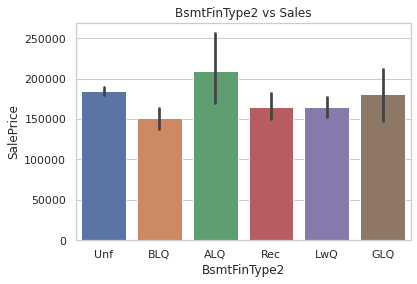

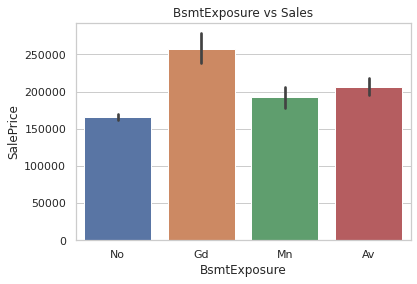

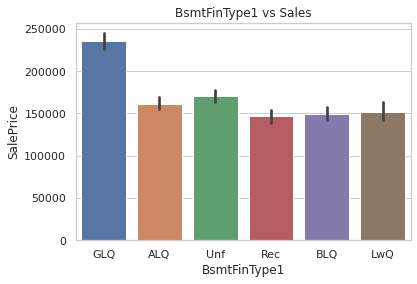

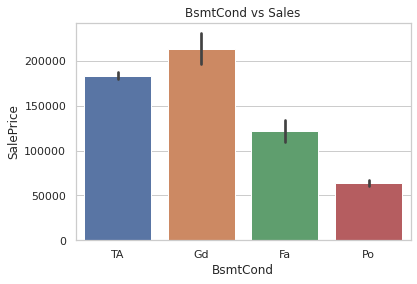

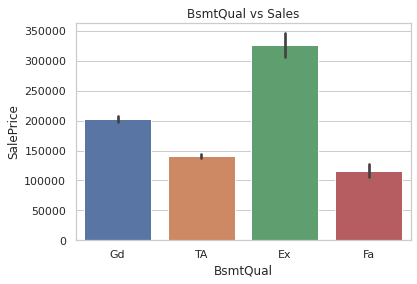

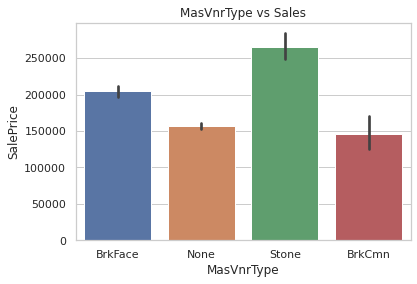

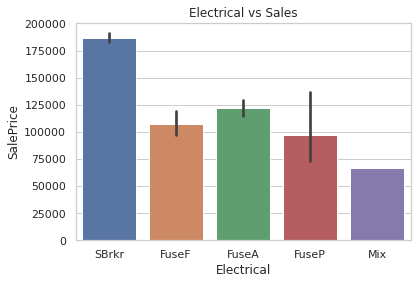

In [ ]:
# Creating bar plots for categorical null values
plt.suptitle("Categorical Null values vs Saleprice", fontsize = 30, y = 1.12)
sns.set(style = "whitegrid")
for feature in null_obj_list:
  sns.barplot(data = train_df, y =  "SalePrice", x =  feature)
  plt.title(feature + " vs Sales")
  #plt.savefig(feature+".png")  #for downloading pictures in colab
  #files.download(feature+".png")
  plt.show()
  print("")

In [ ]:
# Percentage of null values
for null_variable in null_value_columns:
  print(null_variable+" ",np.round(train_df[null_variable].isnull().mean()*100, 4), "% ", train_df[null_variable].isnull().sum(), "Values")

PoolQC  99.5205 %  1453 Values
MiscFeature  96.3014 %  1406 Values
Alley  93.7671 %  1369 Values
Fence  80.7534 %  1179 Values
FireplaceQu  47.2603 %  690 Values
LotFrontage  17.7397 %  259 Values
GarageYrBlt  5.5479 %  81 Values
GarageType  5.5479 %  81 Values
GarageFinish  5.5479 %  81 Values
GarageQual  5.5479 %  81 Values
GarageCond  5.5479 %  81 Values
BsmtFinType2  2.6027 %  38 Values
BsmtExposure  2.6027 %  38 Values
BsmtFinType1  2.5342 %  37 Values
BsmtCond  2.5342 %  37 Values
BsmtQual  2.5342 %  37 Values
MasVnrArea  0.5479 %  8 Values
MasVnrType  0.5479 %  8 Values
Electrical  0.0685 %  1 Values


**Highest percentage of null values in these columns**
<pre>
<br>PoolQC        99.5205 %  1453 Values
<br>MiscFeature   96.3014 %  1406 Values
<br>Alley         93.7671 %  1369 Values
<br>Fence         80.7534 %  1179 Values
</pre>





In [ ]:
#droping null columns with more than 50 % null values
null_greater_50 = [feature for feature in null_value_columns if (train_df[feature].isnull().mean()*100) > 50]
null_greater_50


['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [ ]:
#drop 'PoolQC', 'MiscFeature', 'Alley', 'Fence'
train_df.drop(columns= null_greater_50, inplace= True)

### **Imputing Missing Values**

Null_obj_column, and quant columns updated

In [ ]:
null_value_columns = [i for i in null_value_columns if i not in null_greater_50]
null_value_columns

['FireplaceQu',
 'LotFrontage',
 'GarageYrBlt',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType',
 'Electrical']

In [ ]:
null_obj_list = [i for i in null_value_columns if train_df[i].dtype == 'O']

In [ ]:
null_quant_list = [i for i in null_value_columns if i not in null_obj_list]

In [ ]:
# Creating dictionary for mode values of categorical variables
mode_dict = {}
l = len(null_obj_list)
for i in range(l):
  mode_dict[null_obj_list[i]] = train_df[null_obj_list[i]].value_counts().idxmax()
print(mode_dict)

{'FireplaceQu': 'Gd', 'GarageType': 'Attchd', 'GarageFinish': 'Unf', 'GarageQual': 'TA', 'GarageCond': 'TA', 'BsmtFinType2': 'Unf', 'BsmtExposure': 'No', 'BsmtFinType1': 'Unf', 'BsmtCond': 'TA', 'BsmtQual': 'TA', 'MasVnrType': 'None', 'Electrical': 'SBrkr'}


In [ ]:
#Creating list of keys from mode dictionary
null_obj_keys = list(mode_dict.keys())
null_obj_keys

['FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrType',
 'Electrical']

In [ ]:
# Function to automatically fill obj null values
def imputation(data):
  train_df[data].replace(np.nan, mode_dict[data], inplace = True)
  return train_df[data].isnull().sum()


In [ ]:
# calling function imputation
l = len(null_obj_keys)
for i in range(l):
  print(imputation(null_obj_keys[i]))

0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
# Creating dictionary for mean values of quant variables
mean_dict = {}
l = len(null_quant_list)
for i in range(l):
  mean_dict[null_quant_list[i]] = train_df[null_quant_list[i]].mean()
print(mean_dict)

{'LotFrontage': 70.04995836802665, 'GarageYrBlt': 1978.5061638868744, 'MasVnrArea': 103.68526170798899}


In [ ]:
# Function to automatically fill continues null values
def imputation(data):
  train_df[data].replace(np.nan, mean_dict[data], inplace = True)
  return train_df[data].isnull().sum()


In [ ]:
# Creating key list from mean dictionary

null_quant_keys = list(mean_dict.keys())
null_quant_keys

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [ ]:

# Calling imputation function

l = len(null_quant_keys)
for i in range(l):
  print(imputation(null_quant_keys[i]))

0
0
0


In [ ]:
# Checkin null values again
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Series([], dtype: int64)

All Null values are cleared

###**EDA For All variables**

In [ ]:
# Separating All Categorical Varibles
cat_variables = train_df.select_dtypes("O").columns
print("Number of catergorical variables", len(cat_variables))
train_df[cat_variables].head()

Number of catergorical variables 39


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
# Sepearating year features 
year_variables = [i for i in train_df.columns if "Yr" in i or "Year" in i]
print("Number of year features: ",len(year_variables))
train_df[year_variables].head()

Number of year features:  4


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [ ]:
#Separating continues variables
cont_variables = [i for i in train_df.columns if i not in cat_variables and i not in year_variables]

In [ ]:
# Finding number of unique values in dataset
for i in train_df.columns:
  print(i, "has", train_df[i].nunique(), "values")

Id has 1460 values
MSSubClass has 15 values
MSZoning has 5 values
LotFrontage has 111 values
LotArea has 1073 values
Street has 2 values
LotShape has 4 values
LandContour has 4 values
Utilities has 2 values
LotConfig has 5 values
LandSlope has 3 values
Neighborhood has 25 values
Condition1 has 9 values
Condition2 has 8 values
BldgType has 5 values
HouseStyle has 8 values
OverallQual has 10 values
OverallCond has 9 values
YearBuilt has 112 values
YearRemodAdd has 61 values
RoofStyle has 6 values
RoofMatl has 8 values
Exterior1st has 15 values
Exterior2nd has 16 values
MasVnrType has 4 values
MasVnrArea has 328 values
ExterQual has 4 values
ExterCond has 5 values
Foundation has 6 values
BsmtQual has 4 values
BsmtCond has 4 values
BsmtExposure has 4 values
BsmtFinType1 has 6 values
BsmtFinSF1 has 637 values
BsmtFinType2 has 6 values
BsmtFinSF2 has 144 values
BsmtUnfSF has 780 values
TotalBsmtSF has 721 values
Heating has 6 values
HeatingQC has 5 values
CentralAir has 2 values
Electrical h

In [ ]:
# find ordinal data from numerical data
ordinal_data = [i for i in cont_variables if train_df[i].nunique() < 50]
print("number of ordinal data", len(ordinal_data))
train_df[ordinal_data].head()
  

number of ordinal data 17


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


In [ ]:
# updating continues variables
cont_variables = [i for i in cont_variables if i not in ordinal_data]
print("Length of continues variables", len(cont_variables))
train_df[cont_variables].head()

Length of continues variables 17


,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


<Figure size 432x288 with 0 Axes>

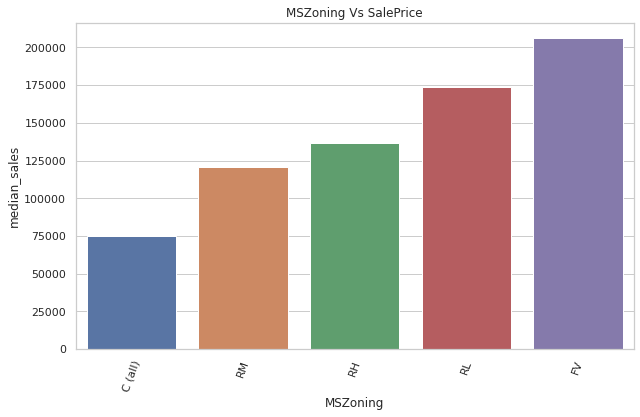

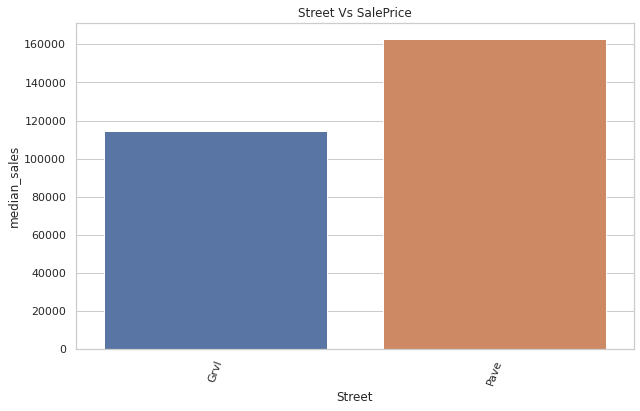

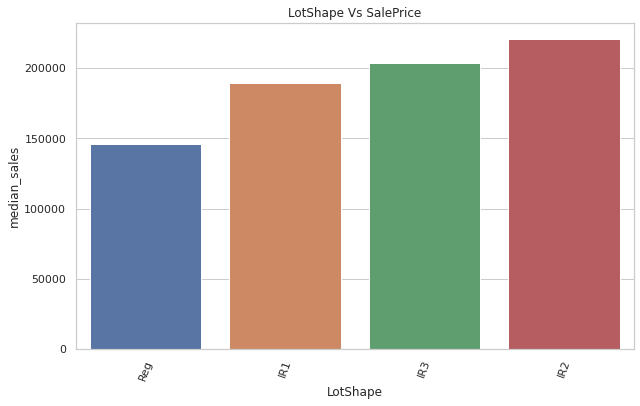

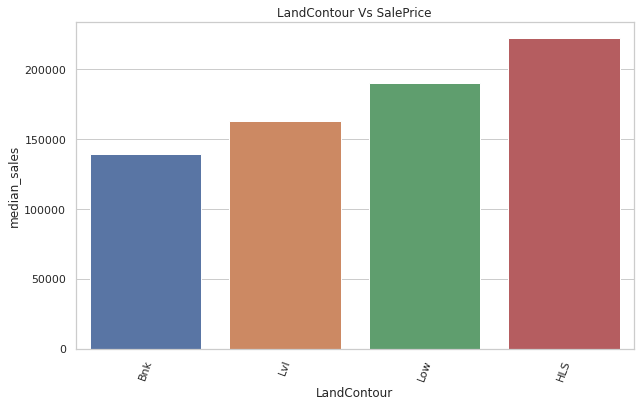

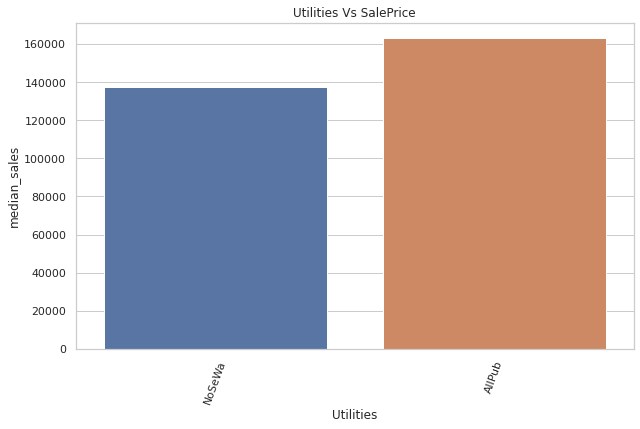

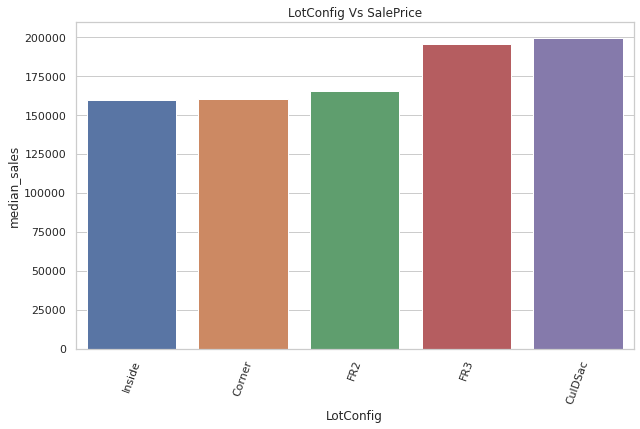

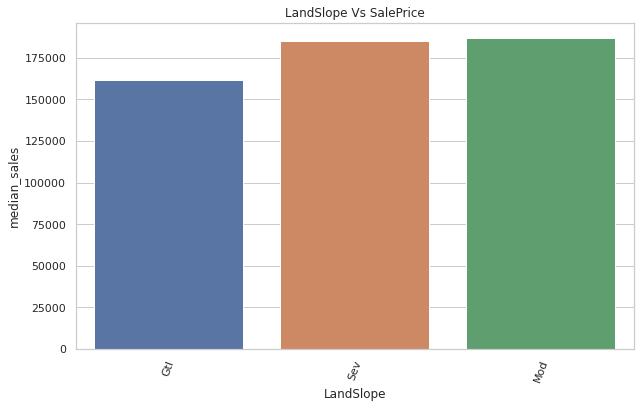

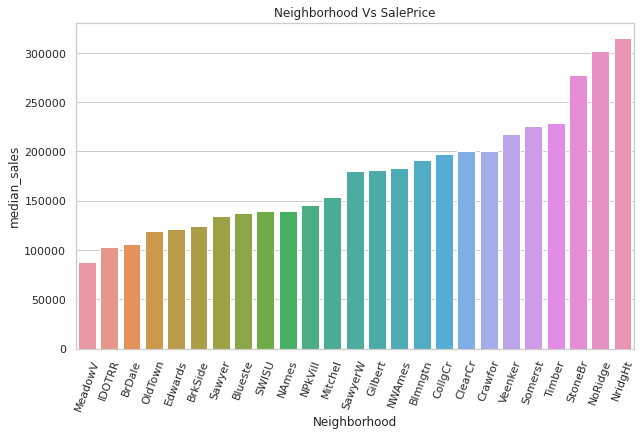

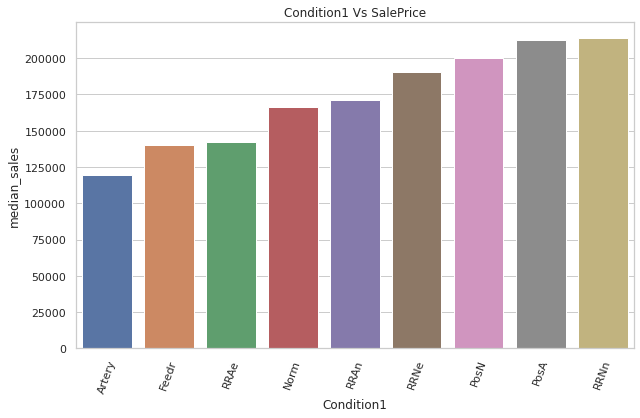

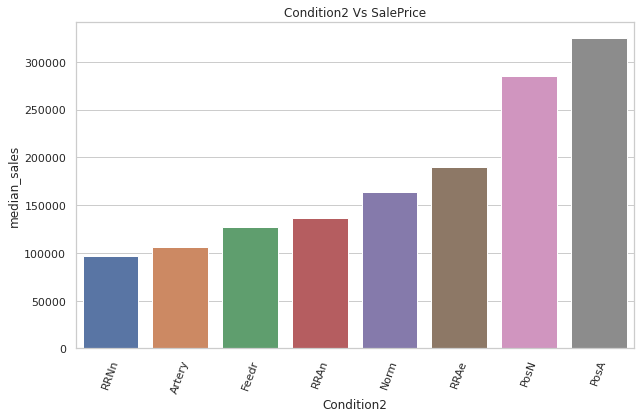

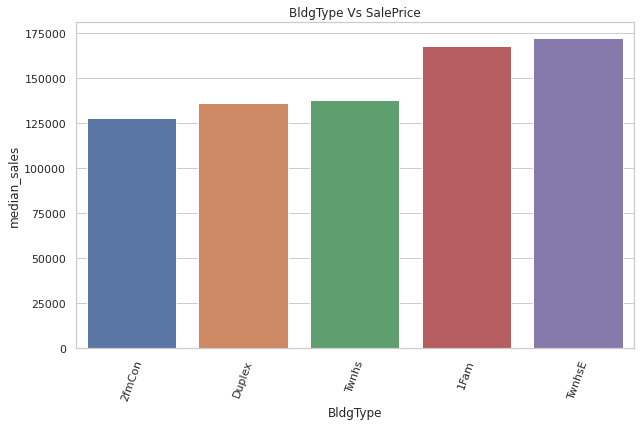

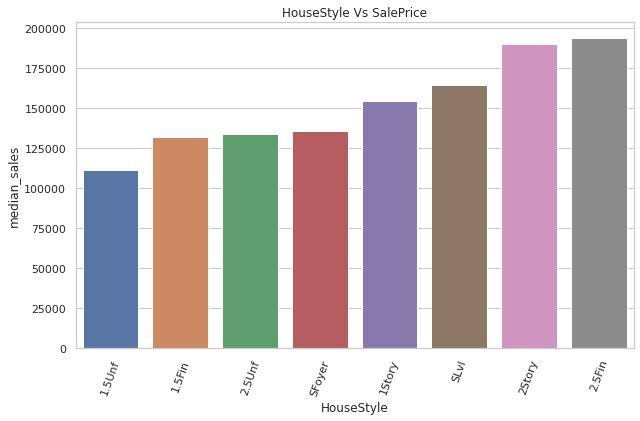

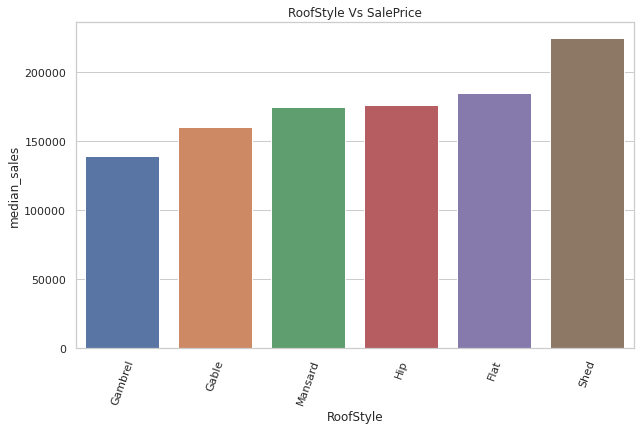

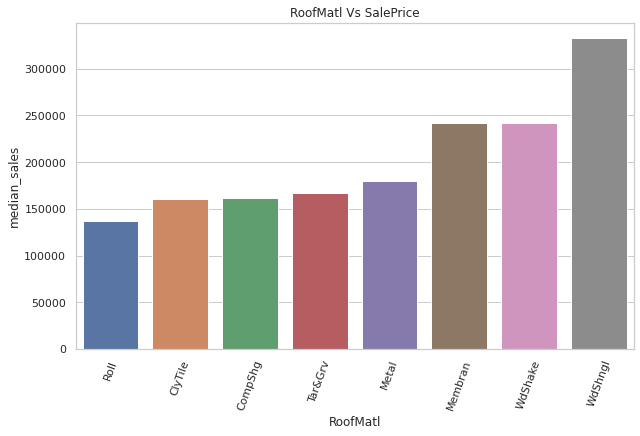

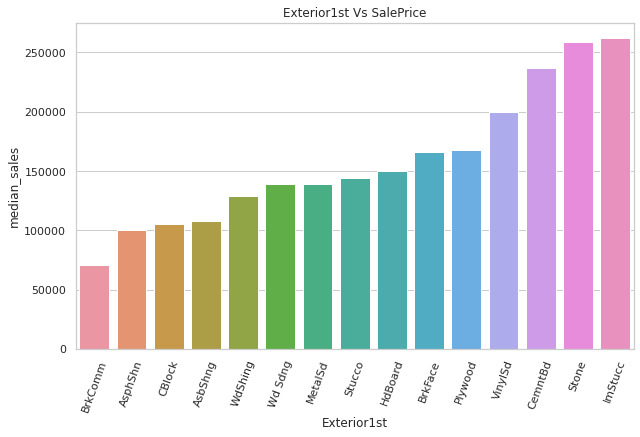

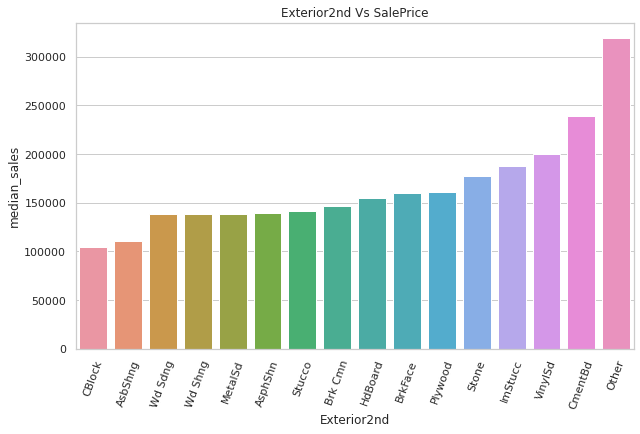

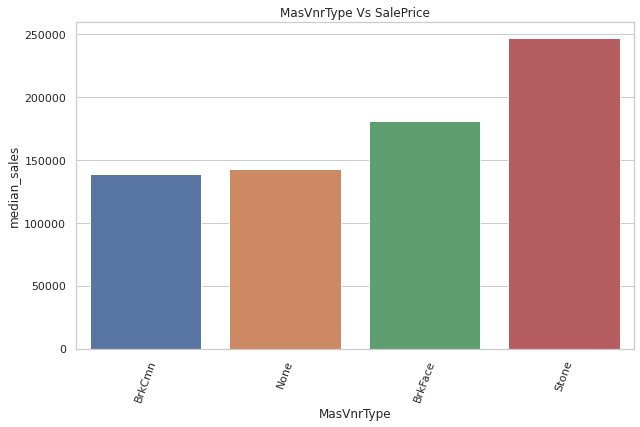

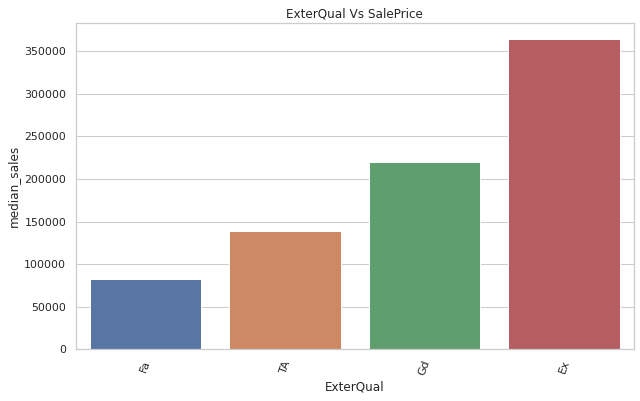

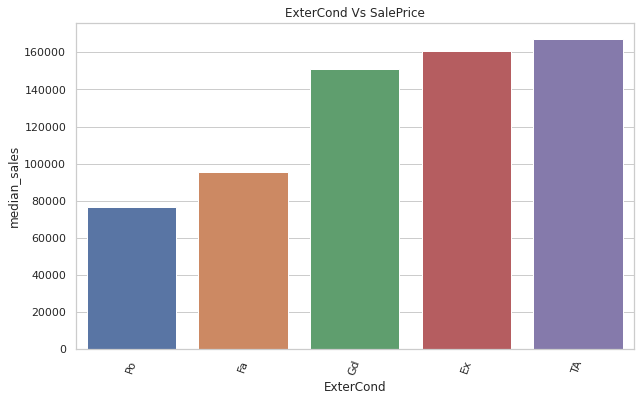

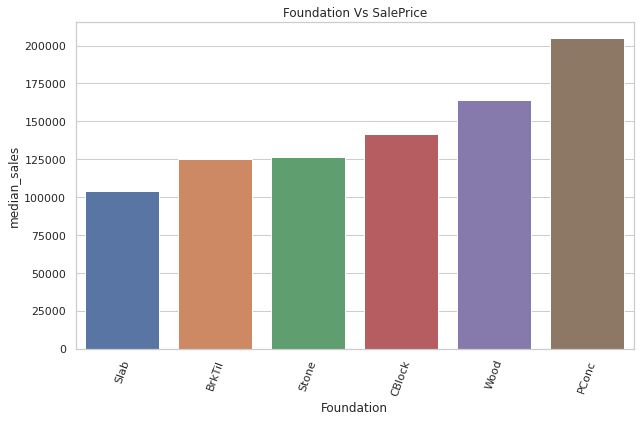

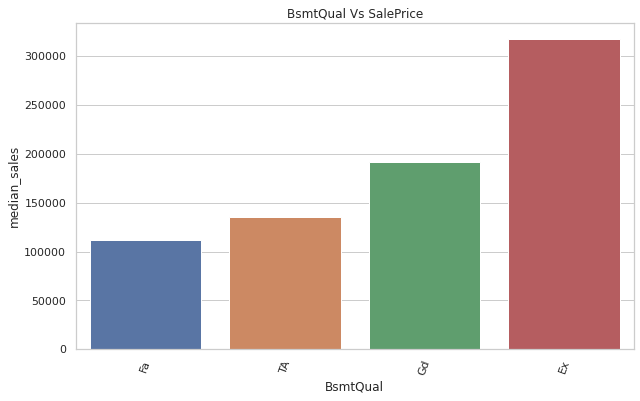

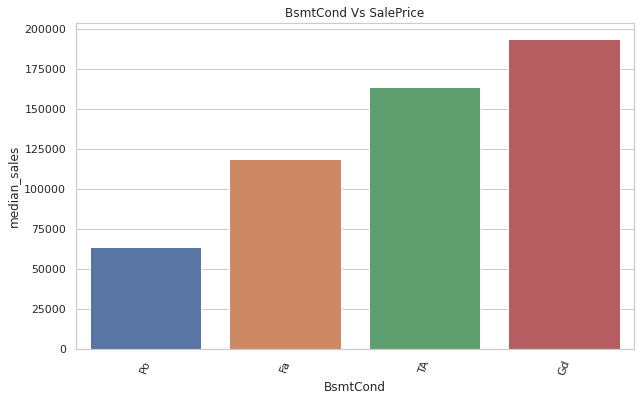

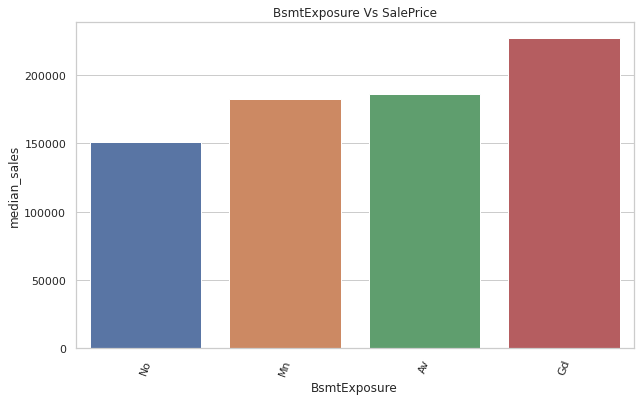

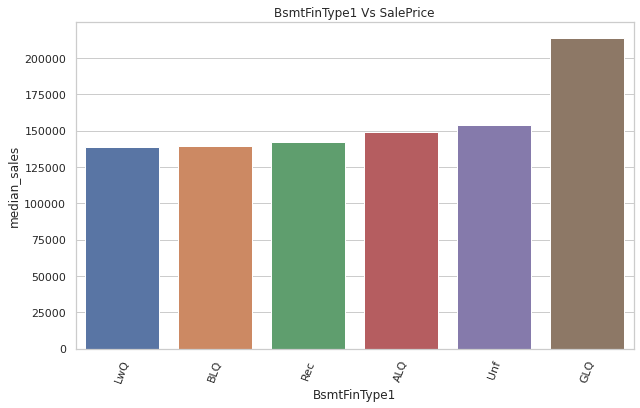

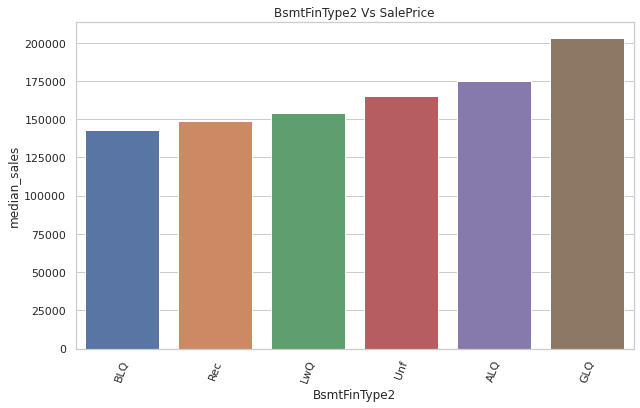

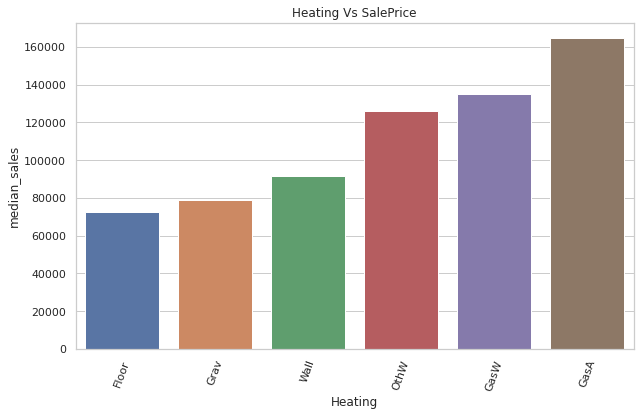

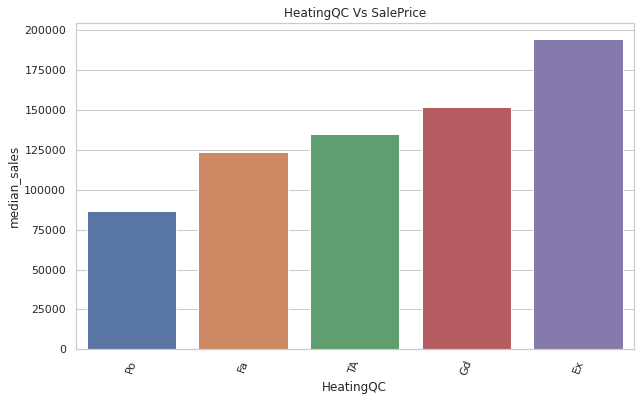

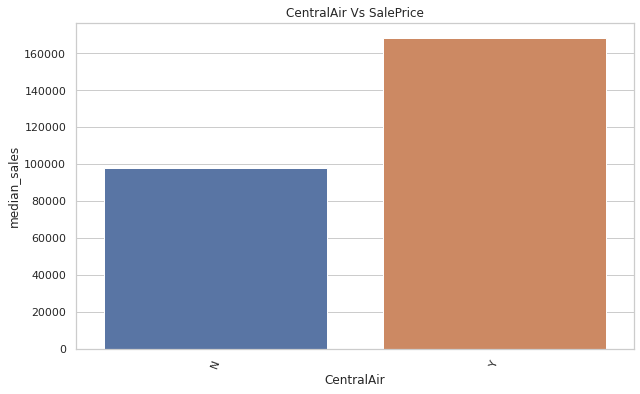

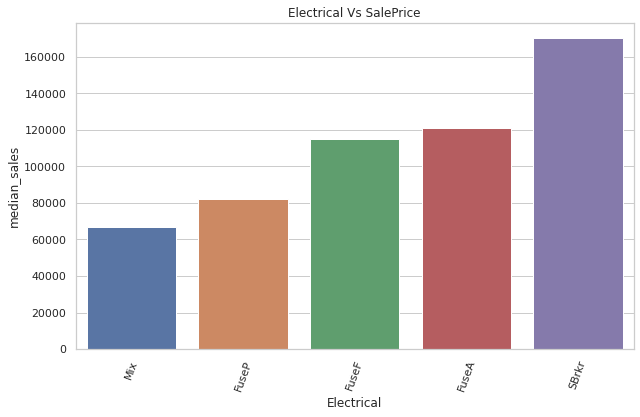

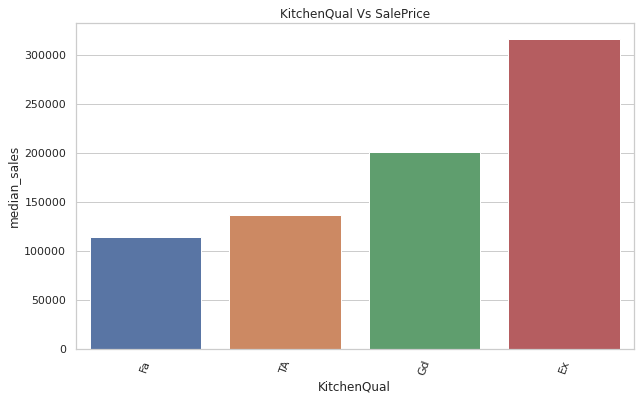

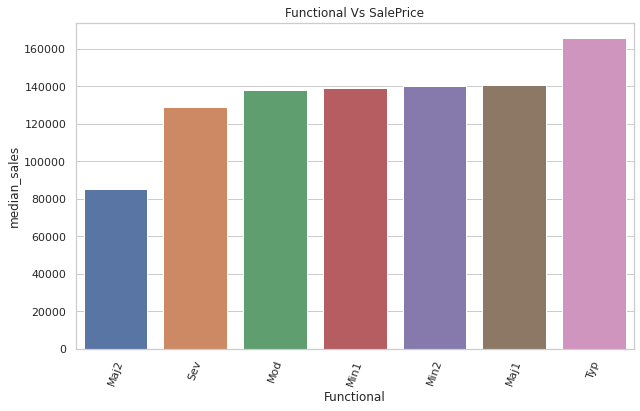

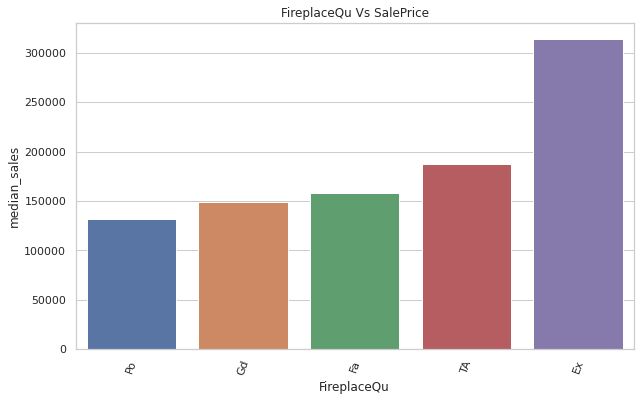

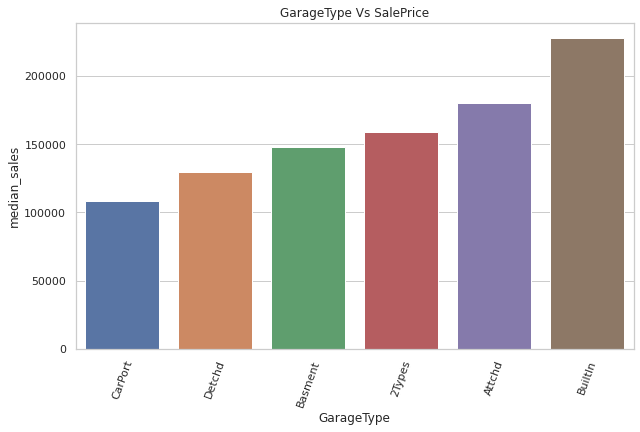

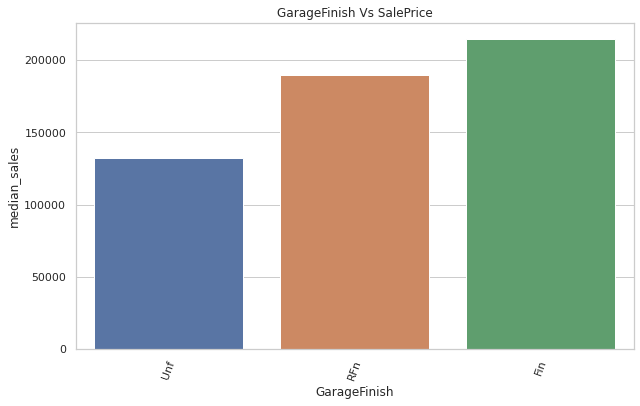

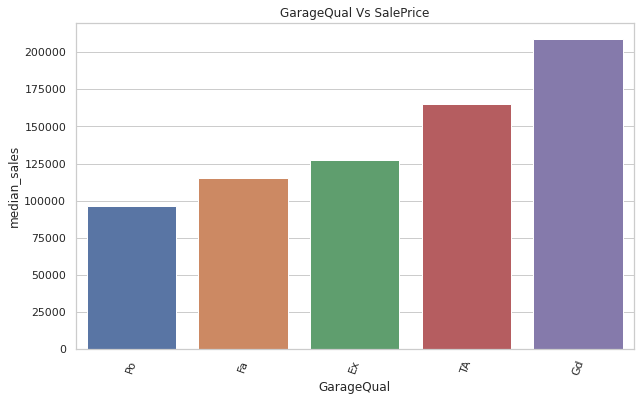

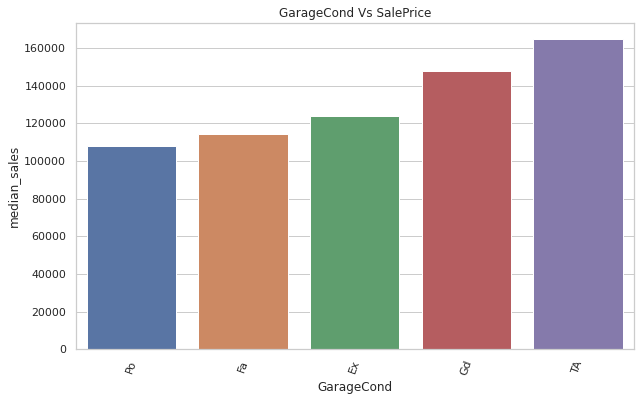

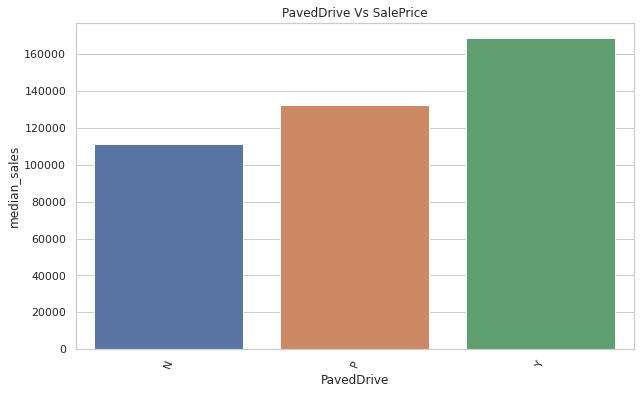

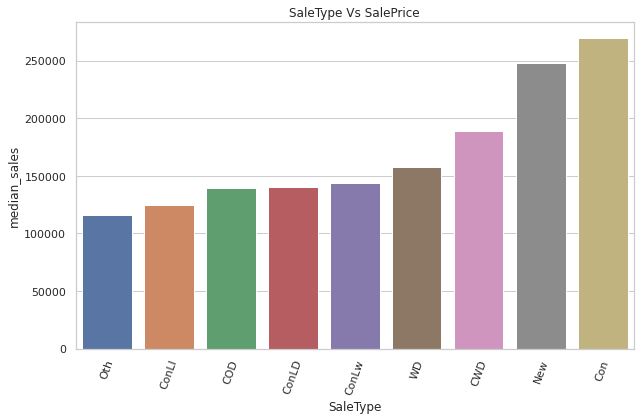

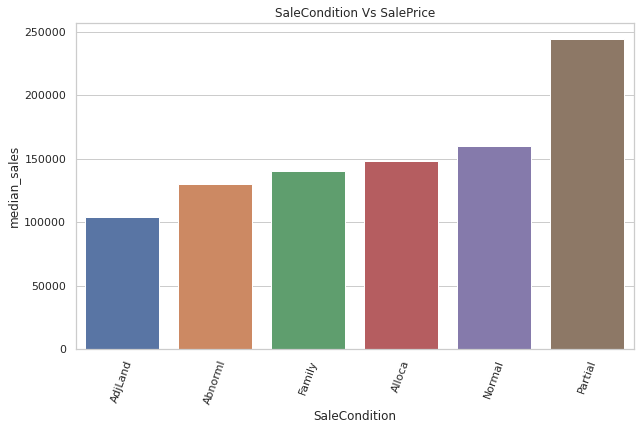

In [ ]:

#


# Creating charts for categorical Variables
data = train_df.copy()
plt.suptitle("Categorical Variables Vs Sales",y = 1.2, fontsize = 30)

#
for feature in cat_variables:
  plt.figure(figsize= (10, 6))
  df = data.groupby(feature).agg(median_sales = ('SalePrice', "median"))
  df  = df.reset_index().sort_values("median_sales")
  sns.barplot(data = df, x = feature, y = "median_sales")
  plt.title(feature + " Vs SalePrice")
  plt.xticks(rotation = 70)
  print("")
  plt.show()

<Figure size 432x288 with 0 Axes>

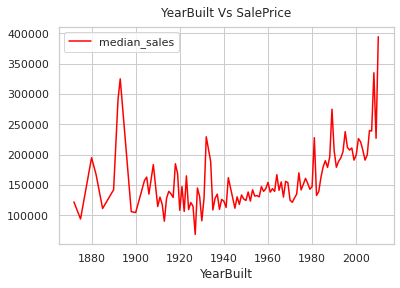

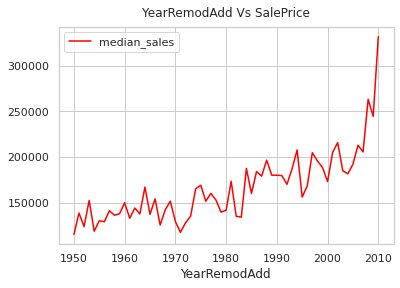

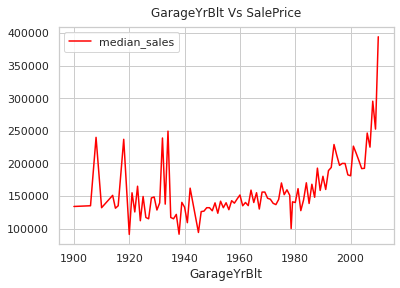

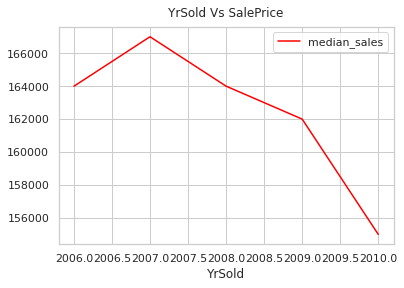

In [ ]:

#
plt.suptitle("Year Features Vs Sales",y = 1.2, fontsize = 30)
for feature in year_variables:
  df = data.groupby(feature).agg(median_sales = ("SalePrice", "median"))
  df.plot(color = "red")
  plt.title(feature + " Vs SalePrice", pad = 10)
  print("")
  plt.show()

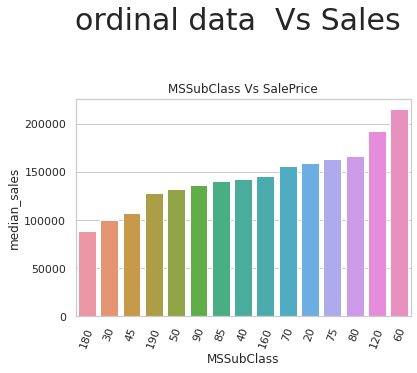

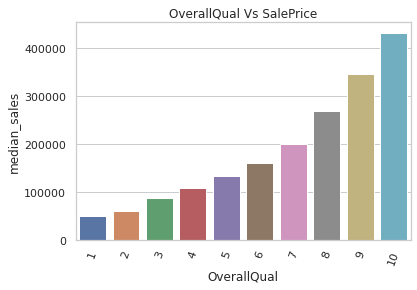

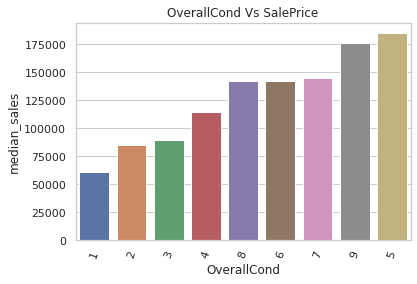

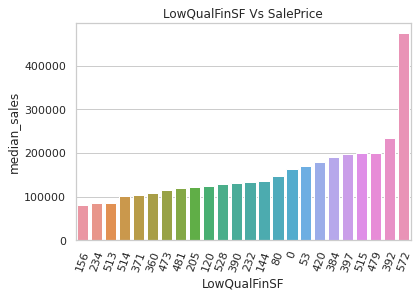

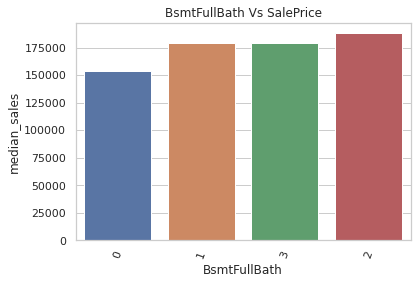

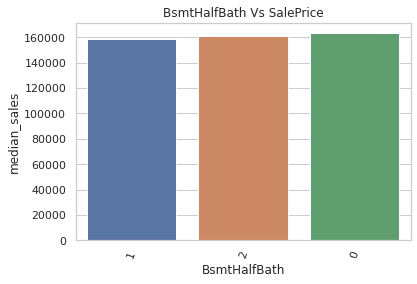

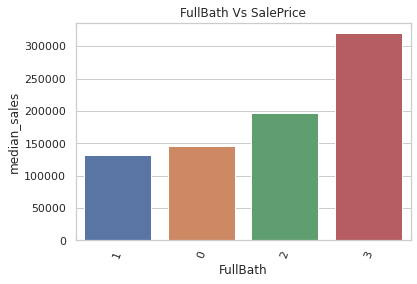

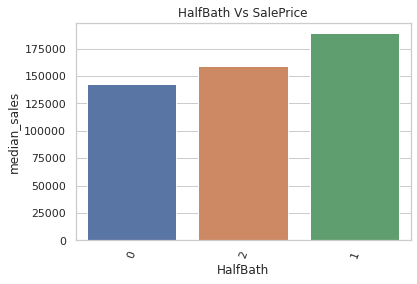

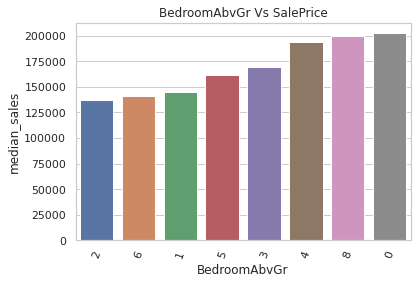

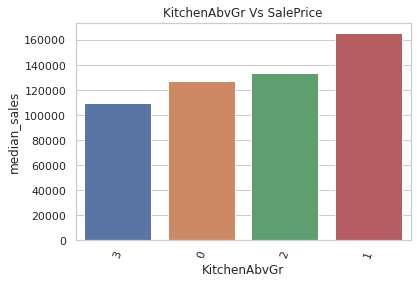

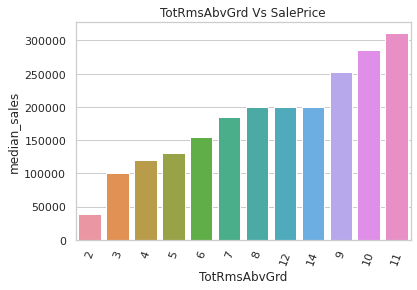

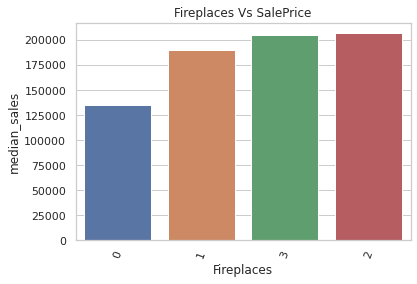

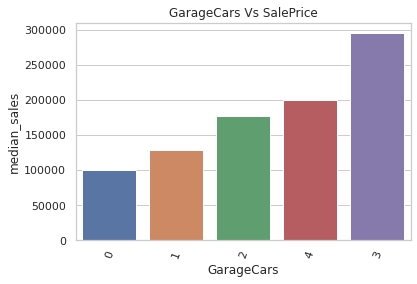

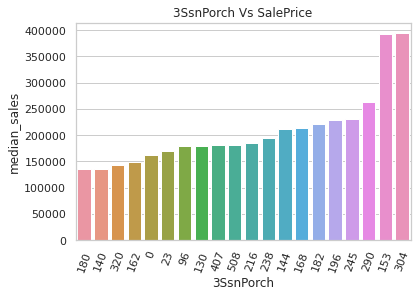

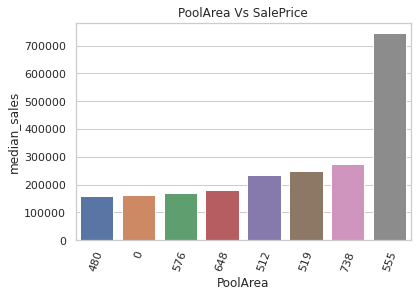

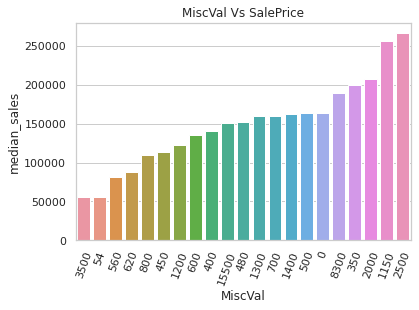

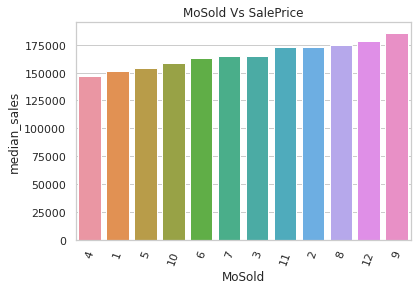

In [ ]:

# Creating charts for ordinal data 
plt.suptitle("ordinal data  Vs Sales",y = 1.2, fontsize = 30)

#
data = train_df.copy()
for feature in ordinal_data:
  df = data.groupby(feature).agg(median_sales = ("SalePrice", "median"))
  df = df.reset_index().sort_values("median_sales")
  sns.barplot(data = df, x = feature, y = "median_sales", order= df[feature])
  plt.title(feature + " Vs SalePrice")
  plt.xticks(rotation = 70)
  print("")
  plt.show()


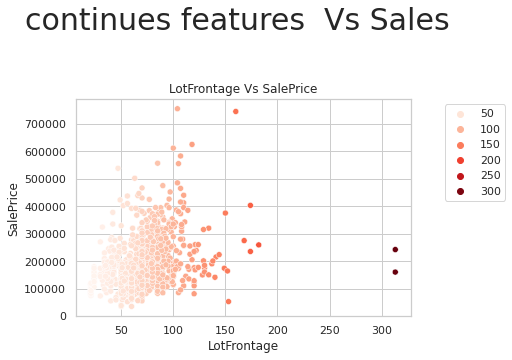

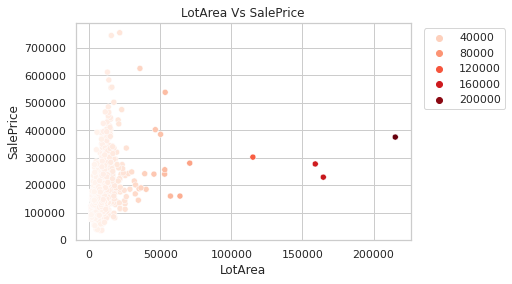

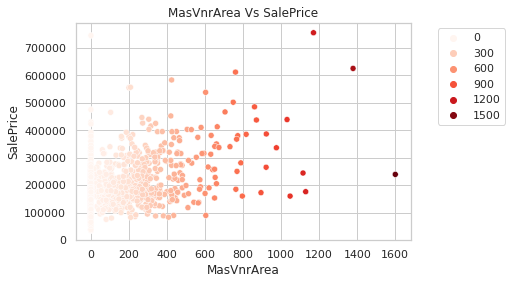

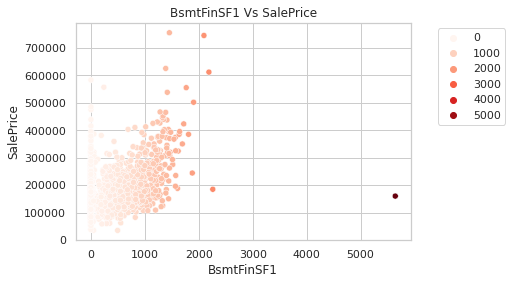

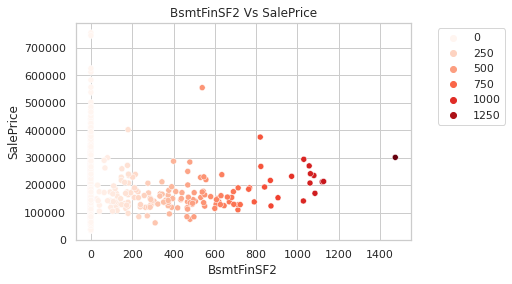

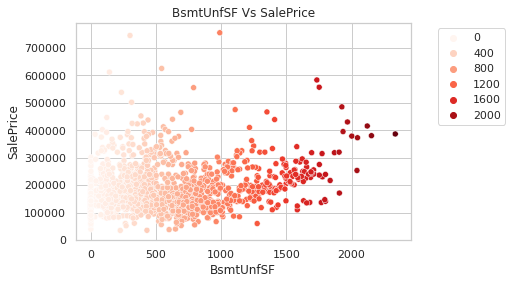

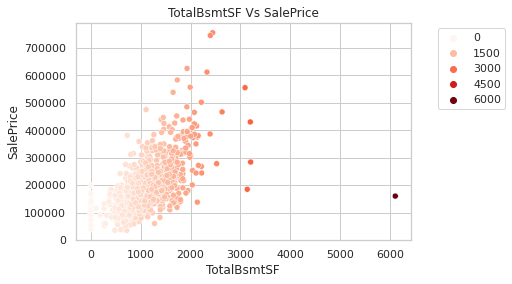

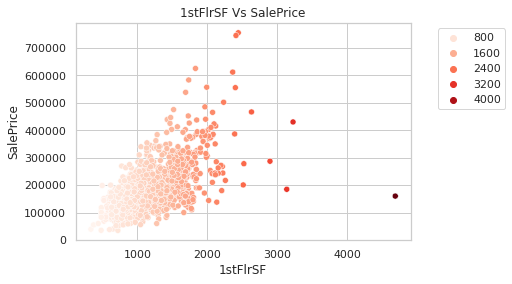

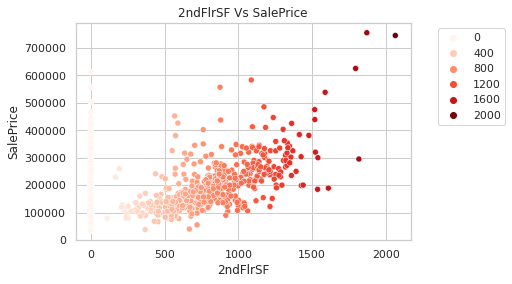

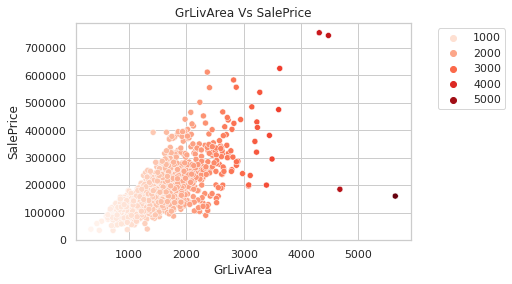

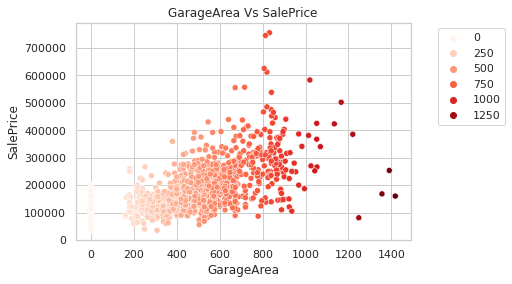

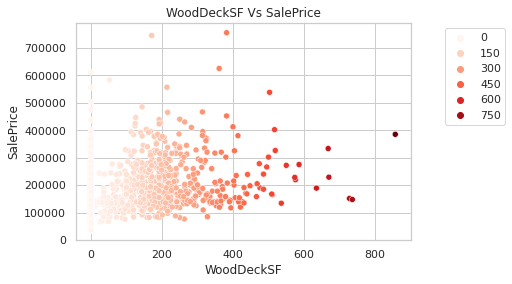

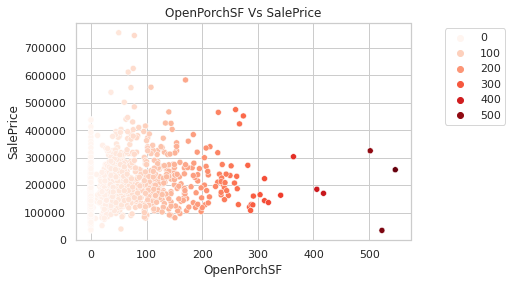

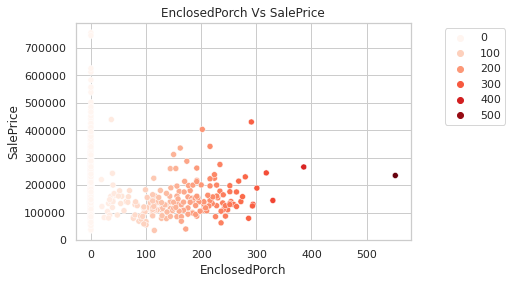

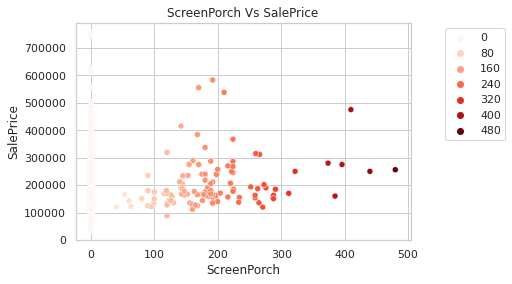

In [160]:
# Creating charts for continues features
plt.suptitle("continues features  Vs Sales",y = 1.2, fontsize = 30)

#removing id and saleprice from cont_variables
Excepted_values = "Id", "SalePrice"
cont_variables_new = [i for i in cont_variables if i not in Excepted_values]

#
data = train_df.copy()
for feature in cont_variables_new:
  sns.scatterplot(data = data , x = feature, y = "SalePrice", hue = feature, palette= "Reds" )
  plt.title(feature + " Vs SalePrice")
  plt.legend(bbox_to_anchor = (1.3, 1))
  #plt.xticks(rotation = 70)
  print("")
  plt.show()


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')